# IE 582 - HOMEWORK 2
### Gizem Güneş

# Task 1

In [10]:
options(scipen = 999)
library(dplyr)
library(ggplot2)
library(caret)

ERROR: Error in library(caret): there is no package called 'caret'


In [11]:
#Data is read and column names are changed as following :
musk = read.csv('C:/Users/gizem/OneDrive/Masaüstü/MS-3/IE582 - Data Mining/Homeworks - gizemgunes/HW2/Musk1.csv', 
                header = F, sep=",")
colnames(musk) = c("Bag_class", "Bag_id", c(paste("Feature", 1:(ncol(musk)-2), sep="")))  


In [12]:
#Understanding the data
table(is.na.data.frame(musk)) #There isn't any NA value.
table(musk$Bag_class) #imbalanced classes

str(musk) #it is observed that all features are integer, so PCA can be implemented.


FALSE 
79968 


  0   1 
269 207 

'data.frame':	476 obs. of  168 variables:
 $ Bag_class : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Bag_id    : int  1 1 1 1 2 2 2 2 3 3 ...
 $ Feature1  : int  42 42 42 42 42 42 42 42 40 44 ...
 $ Feature2  : int  -198 -191 -191 -198 -198 -191 -190 -199 -173 -159 ...
 $ Feature3  : int  -109 -142 -142 -110 -102 -142 -142 -102 -142 -63 ...
 $ Feature4  : int  -75 -65 -75 -65 -75 -65 -75 -65 13 -74 ...
 $ Feature5  : int  -117 -117 -117 -117 -117 -117 -117 -117 -116 -117 ...
 $ Feature6  : int  11 55 11 55 10 55 12 55 -7 17 ...
 $ Feature7  : int  23 49 49 23 24 49 49 23 50 5 ...
 $ Feature8  : int  -88 -170 -161 -95 -87 -170 -161 -94 -171 -114 ...
 $ Feature9  : int  -28 -45 -45 -28 -28 -45 -45 -29 -44 -31 ...
 $ Feature10 : int  -27 5 -28 5 -28 6 -29 6 -103 -33 ...
 $ Feature11 : int  -232 -325 -278 -301 -233 -324 -277 -299 -321 -287 ...
 $ Feature12 : int  -212 -115 -115 -212 -212 -114 -114 -212 -117 -243 ...
 $ Feature13 : int  -66 -107 -67 -107 -67 -106 -68 -106 -242 -73 ...
 $ Feature14 : in

## Task 1 - Part a

In [7]:
feature.data = musk[,3:168]
pca=princomp(scale(feature.data))
summary(pca) #First 24 PCs provide 90% explanation in variance.


Importance of components:
                          Comp.1    Comp.2     Comp.3     Comp.4     Comp.5
Standard deviation     7.1877342 4.8022746 3.55237325 2.91881775 2.85473139
Proportion of Variance 0.3118813 0.1392192 0.07618026 0.05143032 0.04919668
Cumulative Proportion  0.3118813 0.4511005 0.52728074 0.57871106 0.62790774
                           Comp.6     Comp.7     Comp.8     Comp.9   Comp.10
Standard deviation     2.59913653 2.31896328 2.24502940 1.81640717 1.6865540
Proportion of Variance 0.04078152 0.03246332 0.03042631 0.01991736 0.0171714
Cumulative Proportion  0.66868926 0.70115258 0.73157890 0.75149625 0.7686677
                          Comp.11    Comp.12    Comp.13    Comp.14    Comp.15
Standard deviation     1.60187671 1.54004941 1.48419974 1.45061797 1.34505315
Proportion of Variance 0.01549043 0.01431774 0.01329811 0.01270315 0.01092155
Cumulative Proportion  0.78415808 0.79847583 0.81177394 0.82447709 0.83539863
                           Comp.16     Comp.17    

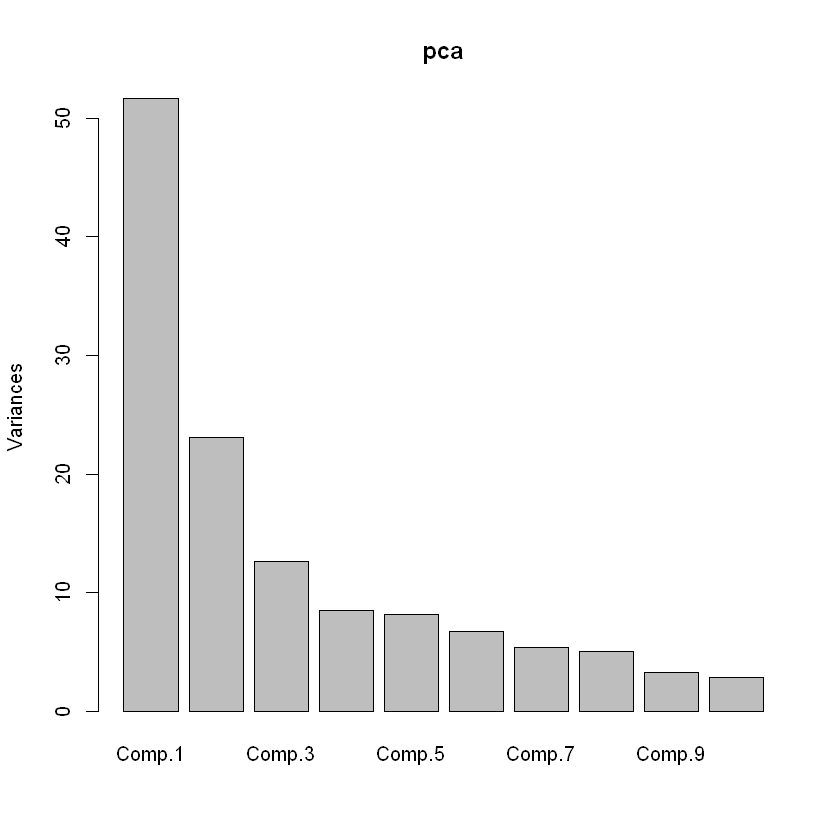

In [14]:
#PCA result can be plotted as following :
plot(pca)

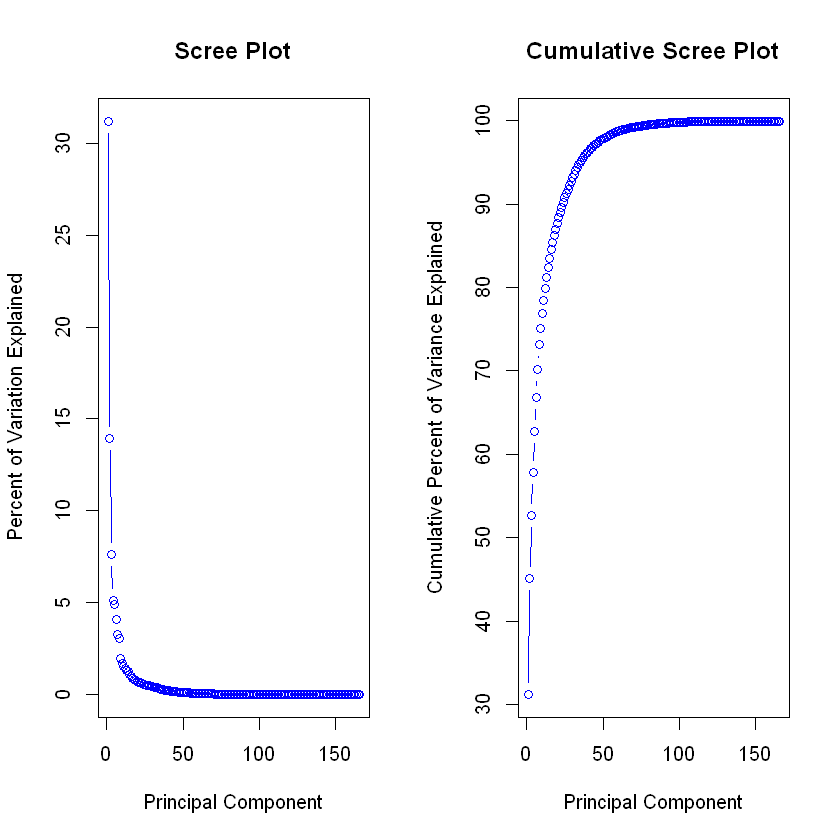

In [15]:
#Scree and cumulative scree plots can be drawn as following :
pca.var = pca$sdev^2                                     
pca.var.per = round(pca.var/sum(pca.var)*100,2)
par(mfrow=c(1,2))
plot(pca.var.per, main = "Scree Plot",
     xlab = "Principal Component",
     ylab = "Percent of Variation Explained", 
     type = "b",
     col="blue")
plot(cumsum(pca.var.per), main = "Cumulative Scree Plot",
     xlab = "Principal Component",
     ylab = "Cumulative Percent of Variance Explained",
     type = "b",
     col="blue")


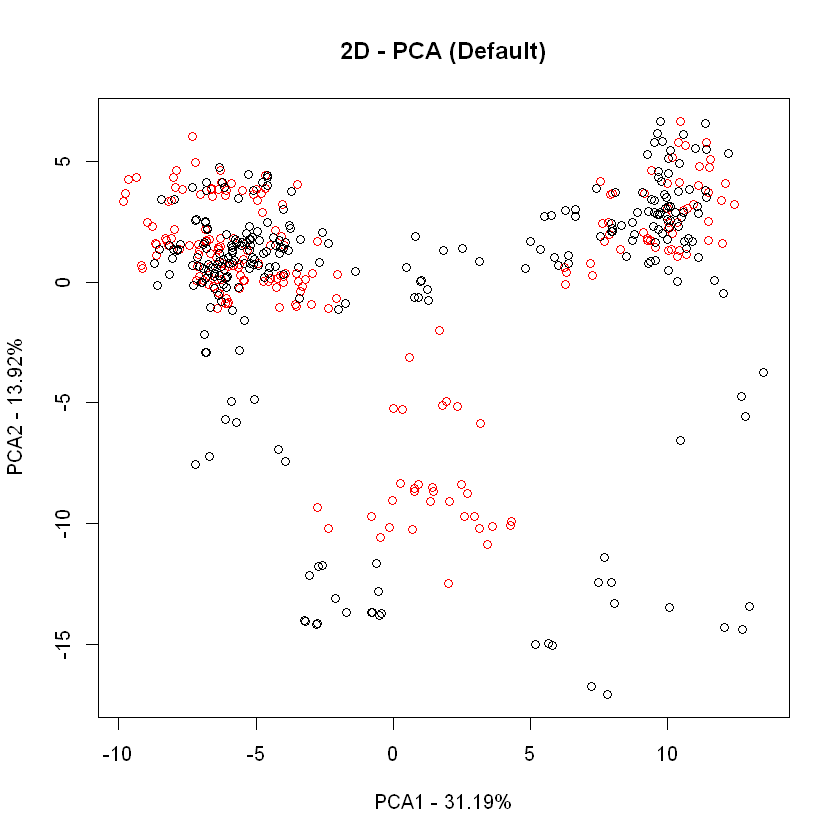

In [16]:
#2-D and color-coded plot can be drawn as following :
musk$color[musk$Bag_class == 0] = "black" 
musk$color[musk$Bag_class == 1] = "red" 
plot(pca$scores[,1], pca$scores[,2], col=musk$color,
     xlab = paste("PCA1 - ", pca.var.per[1], "%", sep=""),
     ylab = paste("PCA2 - ", pca.var.per[2], "%", sep=""),
     main = "2D - PCA (Default)")

In [18]:
#Euclidean is selected for MDS and it is implemented as following :
distance_matrix = dist(scale(feature.data, center=TRUE, scale=TRUE), method="euclidean")
mds=cmdscale(distance_matrix, eig=TRUE)


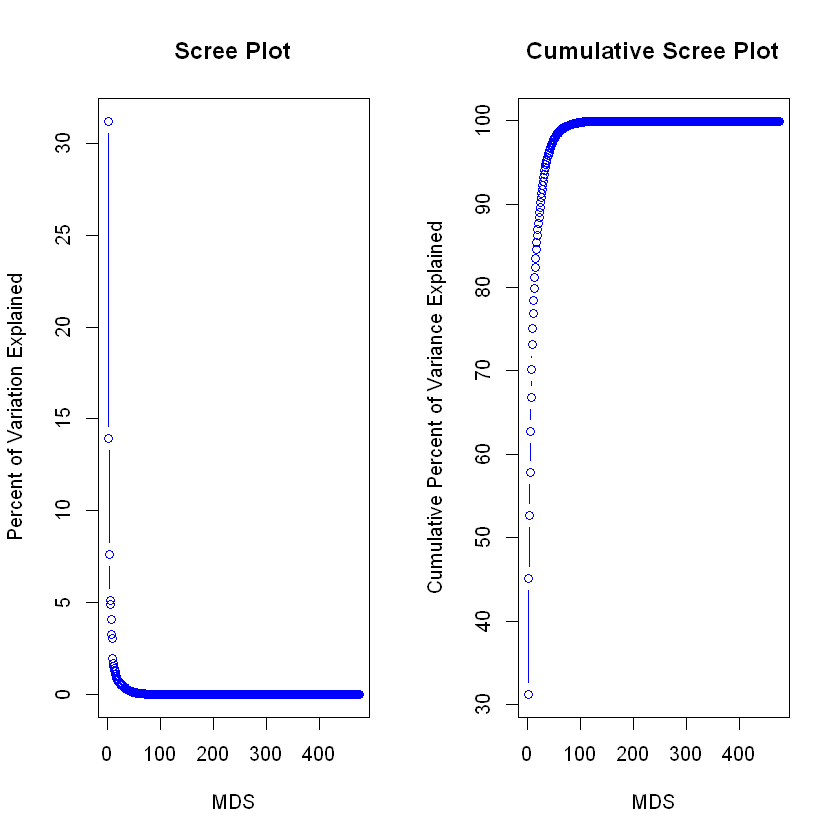

In [19]:
#Scree and cumulative scree plots of MDS are drawn as following :
mds.var.per = round(mds$eig/sum(mds$eig)*100,2)
par(mfrow=c(1,2))
plot(mds.var.per, main = "Scree Plot",
     xlab = "MDS",
     ylab = "Percent of Variation Explained", 
     type = "b",
     col="blue")
plot(cumsum(mds.var.per), main = "Cumulative Scree Plot",
     xlab = "MDS",
     ylab = "Cumulative Percent of Variance Explained",
     type = "b",
     col="blue")

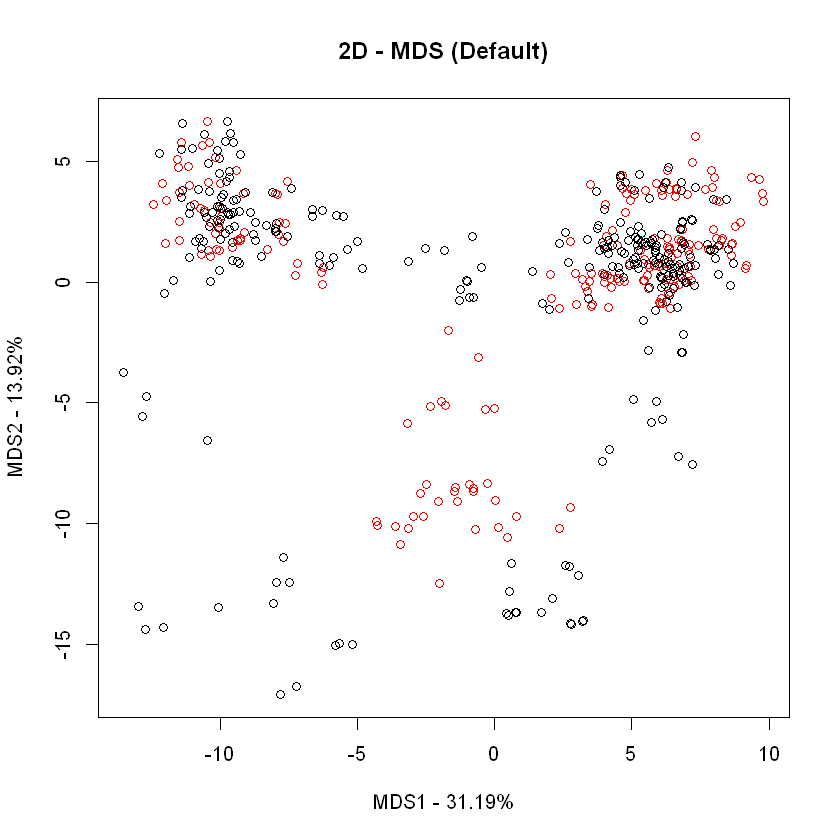

In [20]:
#2-D and color-coded plot of MDS is drawn as following :
mds$values = mds$points
plot(mds$values[,1], mds$values[,2], col=musk$color,
     xlab = paste("MDS1 - ", mds.var.per[1], "%", sep=""),
     ylab = paste("MDS2 - ", mds.var.per[2], "%", sep=""),
     main = "2D - MDS (Default)")

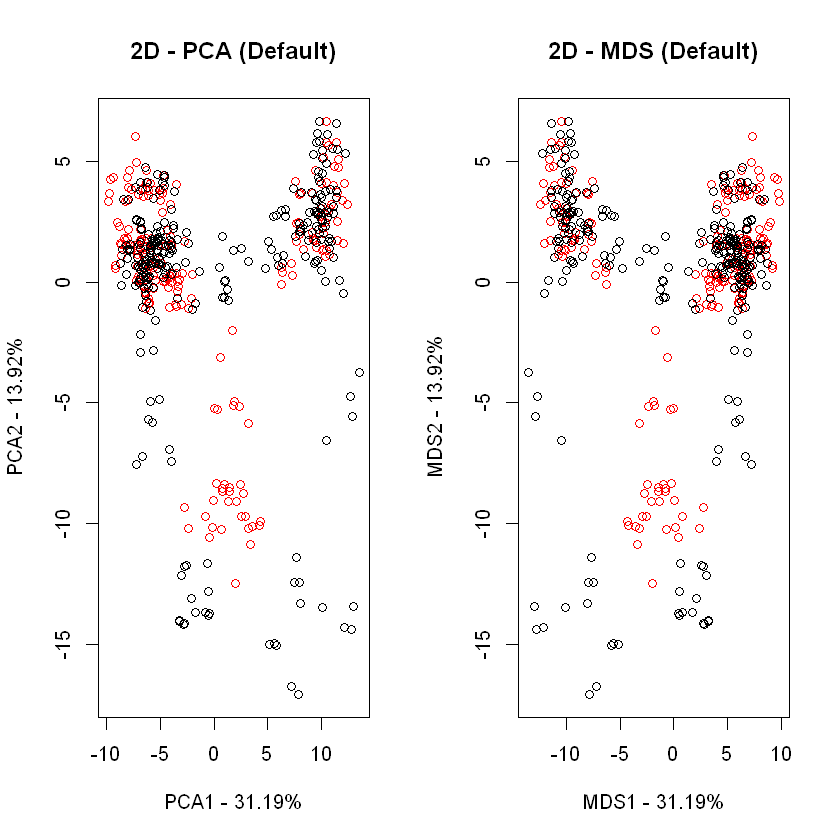

In [21]:
#Comparison of PCA and MDS for Default Data
par(mfrow=c(1,2))
plot(pca$scores[,1], pca$scores[,2], col=musk$color,
     xlab = paste("PCA1 - ", pca.var.per[1], "%", sep=""),
     ylab = paste("PCA2 - ", pca.var.per[2], "%", sep=""),
     main = "2D - PCA (Default)")
plot(mds$values[,1], mds$values[,2], col=musk$color,
     xlab = paste("MDS1 - ", mds.var.per[1], "%", sep=""),
     ylab = paste("MDS2 - ", mds.var.per[2], "%", sep=""),
     main = "2D - MDS (Default)") 

### Conclusion of Task1 - Part a : 
Results of PCA and MDS are similar to each other. Two components of PCA and MDS provide approximately 45% explanation in variance. In addition, seperated clusters aren't shown in results of both methods. As it is said before, first 24 components provide 90% explanation in variance. If this explanation of variance is possible to be observed in a 2-D graph, considering how good is the assumption would be meaningful. If the enough explanation is provided and also colors are seperated clearly, it would be said that the assumption is proper. However, according to these results, evaluating the assumption isn't meaningful. 

# Task 1 - Part b

In [23]:
#Averages of each Bag Id is calculated as following :
musk_average = musk[,1:168] %>%
  group_by(Bag_id) %>%
  summarise_all(funs(mean))

Warning message:
"funs() is soft deprecated as of dplyr 0.8.0
Please use a list of either functions or lambdas: 

  # Simple named list: 
  list(mean = mean, median = median)

  # Auto named with `tibble::lst()`: 
  tibble::lst(mean, median)

  # Using lambdas
  list(~ mean(., trim = .2), ~ median(., na.rm = TRUE))
This warning is displayed once per session."

In [25]:
#PCA is implemented as following :
feature.data2 = musk_average[,3:168]
pca2=prcomp(scale(feature.data2))

In [26]:
summary(pca2) #First 12 PCs provide 90% explanation in variance.

Importance of components:
                          PC1    PC2    PC3    PC4     PC5     PC6     PC7
Standard deviation     6.6528 5.6257 4.6908 4.2063 3.10049 2.75154 2.24499
Proportion of Variance 0.2666 0.1907 0.1326 0.1066 0.05791 0.04561 0.03036
Cumulative Proportion  0.2666 0.4573 0.5898 0.6964 0.75433 0.79993 0.83030
                           PC8     PC9    PC10    PC11    PC12   PC13    PC14
Standard deviation     1.88542 1.80613 1.60162 1.41639 1.29688 1.2561 1.23131
Proportion of Variance 0.02141 0.01965 0.01545 0.01209 0.01013 0.0095 0.00913
Cumulative Proportion  0.85171 0.87136 0.88681 0.89890 0.90903 0.9185 0.92767
                          PC15    PC16    PC17    PC18    PC19    PC20    PC21
Standard deviation     1.05946 1.02942 0.93512 0.91230 0.86691 0.79297 0.78039
Proportion of Variance 0.00676 0.00638 0.00527 0.00501 0.00453 0.00379 0.00367
Cumulative Proportion  0.93443 0.94081 0.94608 0.95110 0.95562 0.95941 0.96308
                          PC22   PC23    PC24 

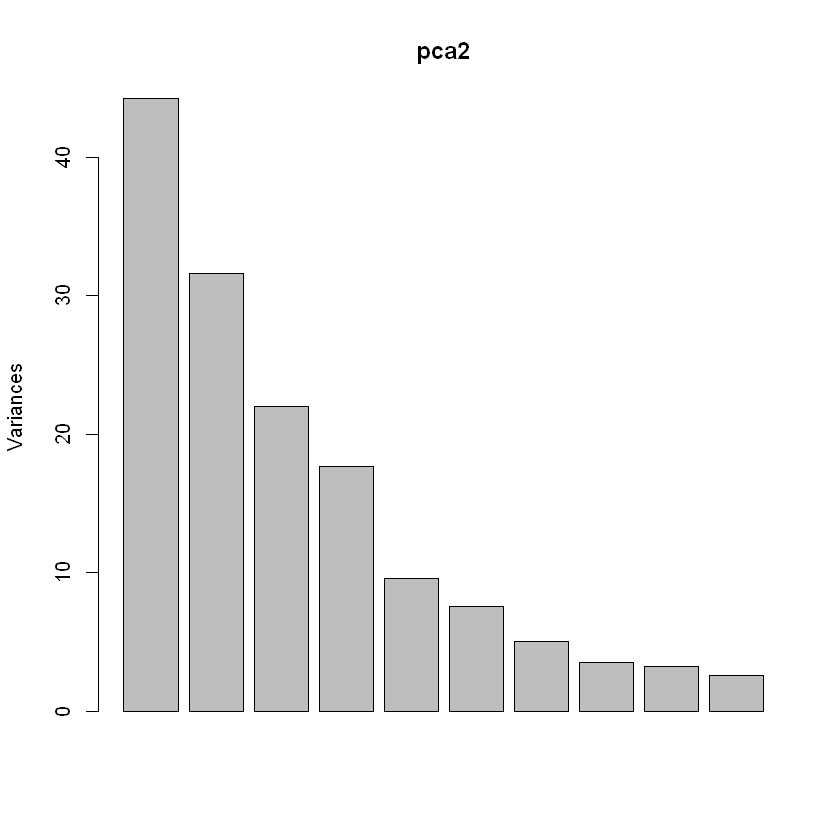

In [28]:
#PCA result can be plotted as following :
plot(pca2)

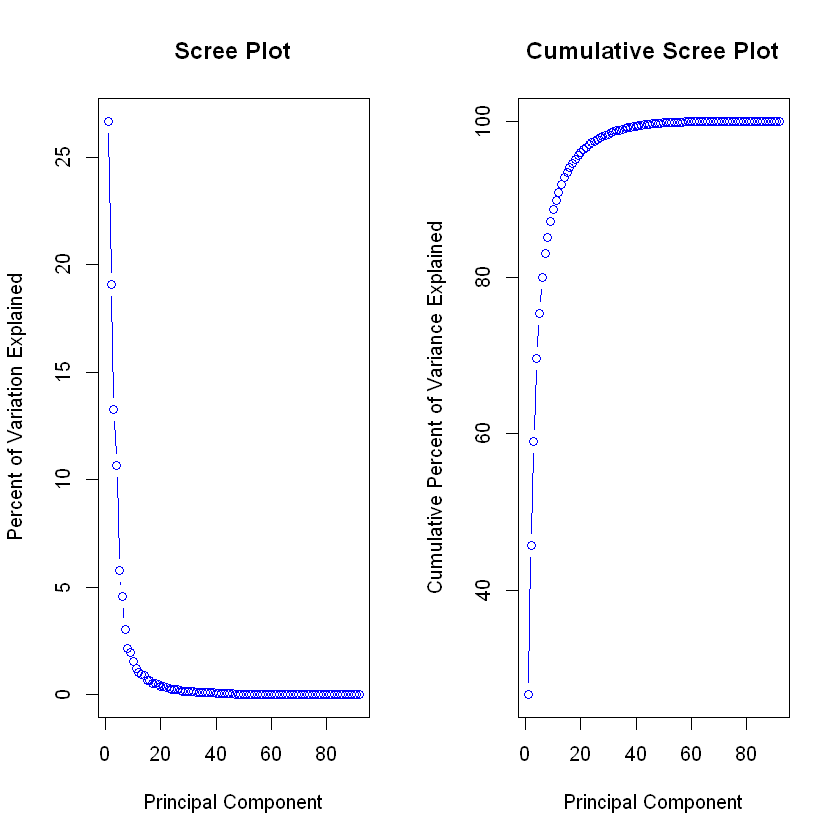

In [29]:
#Scree and cumulative scree plots of PCA are drawn as following :
pca.var2 = pca2$sdev^2                                     
pca.var.per2 = round(pca.var2/sum(pca.var2)*100,2)
par(mfrow=c(1,2))
plot(pca.var.per2, main = "Scree Plot",
     xlab = "Principal Component",
     ylab = "Percent of Variation Explained", 
     type = "b",
     col="blue")
plot(cumsum(pca.var.per2), main = "Cumulative Scree Plot",
     xlab = "Principal Component",
     ylab = "Cumulative Percent of Variance Explained",
     type = "b",
     col="blue")

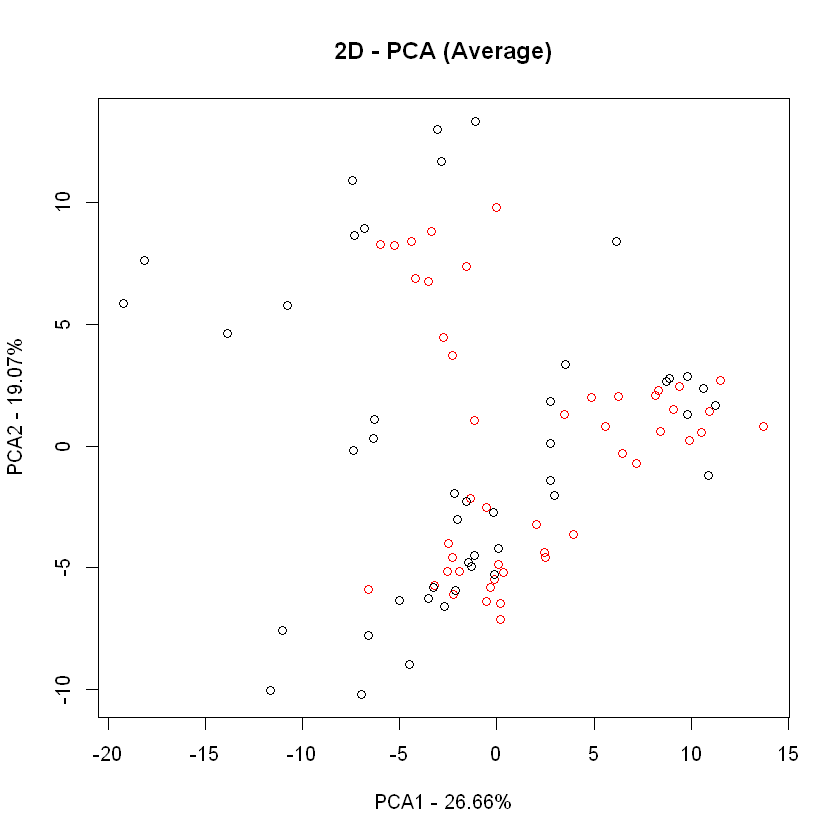

In [32]:
#2-D and color-coded plot of PCA is drawn as following :
musk_average$color[musk_average$Bag_class == 0] = "black" 
musk_average$color[musk_average$Bag_class == 1] = "red" 
plot(pca2$x[,1], pca2$x[,2], col=musk_average$color,
     xlab = paste("PCA1 - ", pca.var.per2[1], "%", sep=""),
     ylab = paste("PCA2 - ", pca.var.per2[2], "%", sep=""),
     main = "2D - PCA (Average)")


In [33]:
#Euclidean is implemented for MDS again : 
distance_matrix2 = dist(scale(feature.data2, center=TRUE, scale=TRUE), method="euclidean")
mds2=cmdscale(distance_matrix2, eig=TRUE)

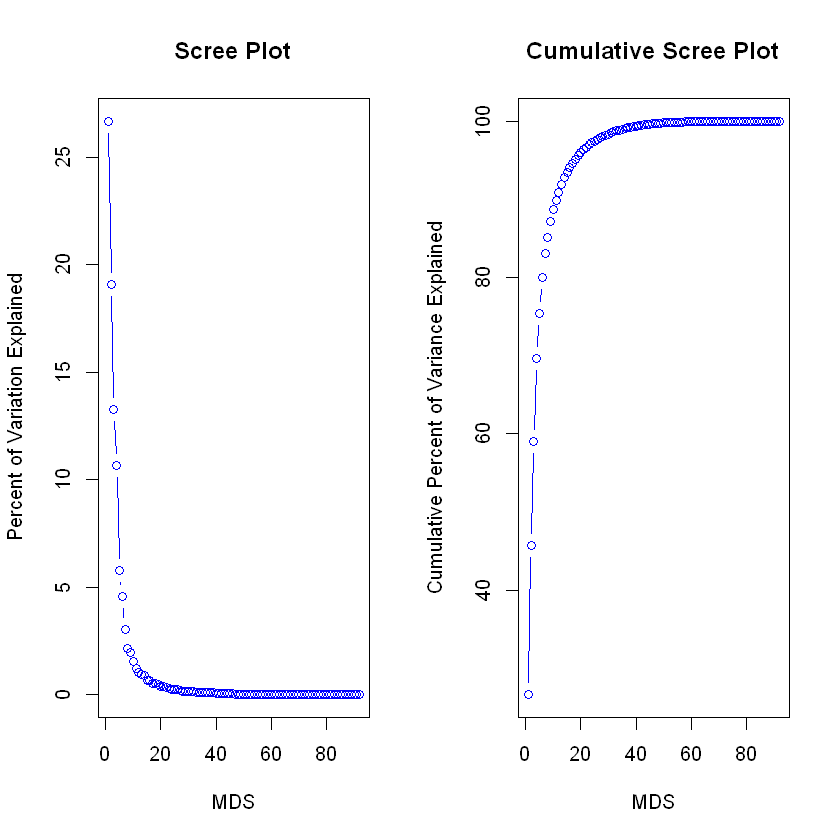

In [34]:
#Scree and cumulative scree plots of MDS are drawn as following :
mds.var.per2 = round(mds2$eig/sum(mds2$eig)*100,2)
par(mfrow=c(1,2))
plot(mds.var.per2, main = "Scree Plot",
     xlab = "MDS",
     ylab = "Percent of Variation Explained", 
     type = "b",
     col="blue")
plot(cumsum(mds.var.per2), main = "Cumulative Scree Plot",
     xlab = "MDS",
     ylab = "Cumulative Percent of Variance Explained",
     type = "b",
     col="blue")

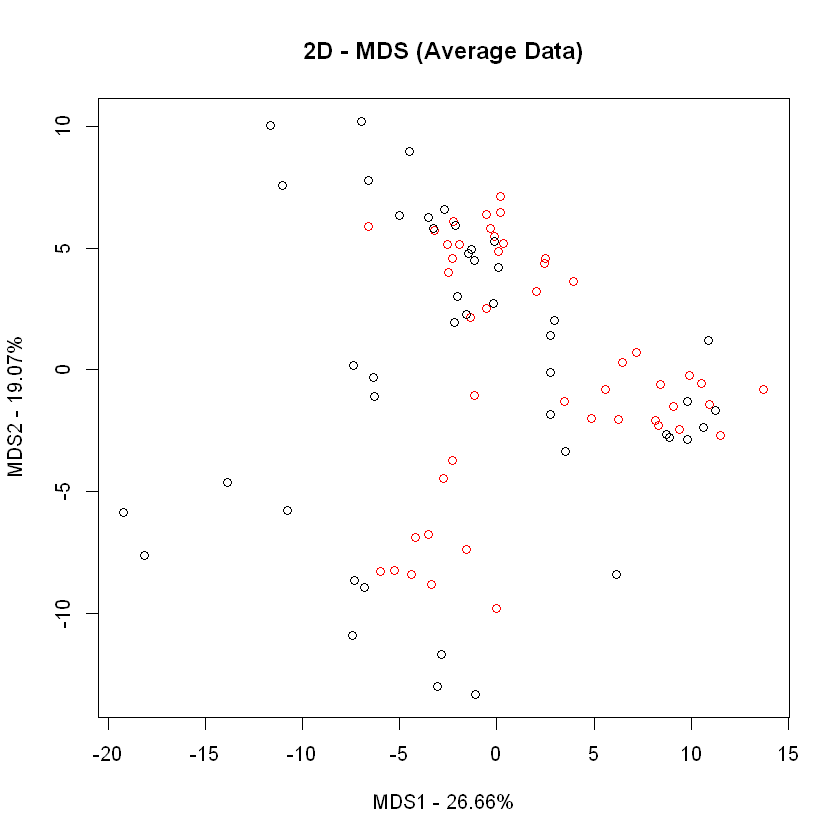

In [35]:
#2-D and color-coded plot of MDS is drawn as following :
mds2$values = mds2$points
plot(mds2$values[,1], mds2$values[,2], col=musk_average$color,
     xlab = paste("MDS1 - ", mds.var.per2[1], "%", sep=""),
     ylab = paste("MDS2 - ", mds.var.per2[2], "%", sep=""),
     main = "2D - MDS (Average Data)") 

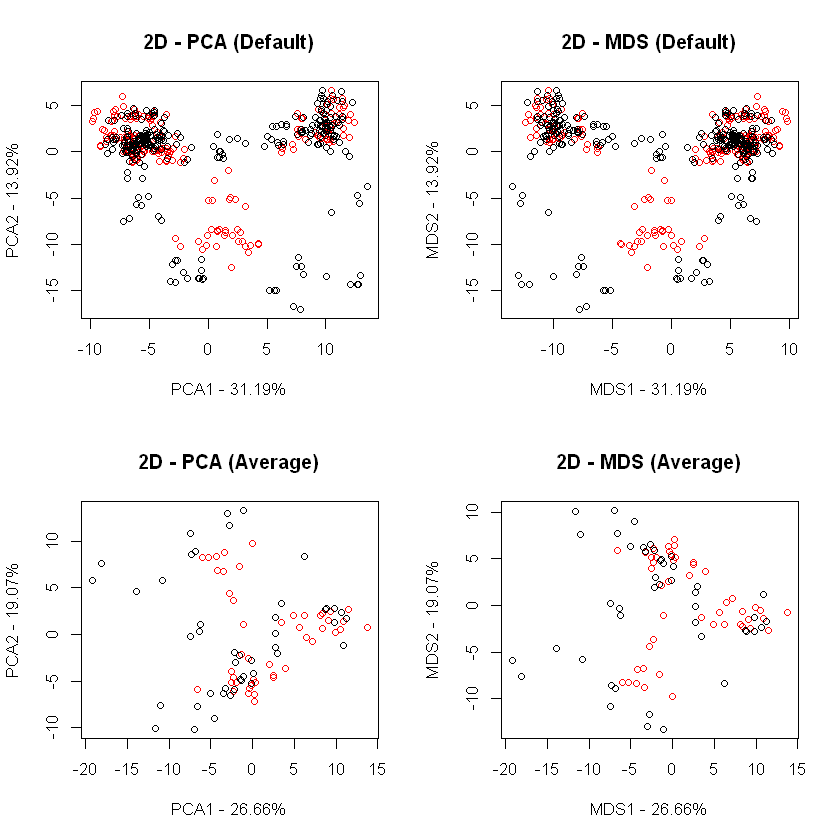

In [36]:
#Comparison of PCA and MDS for Default and Average Data
par(mfrow=c(2,2))
plot(pca$scores[,1], pca$scores[,2], col=musk$color,
     xlab = paste("PCA1 - ", pca.var.per[1], "%", sep=""),
     ylab = paste("PCA2 - ", pca.var.per[2], "%", sep=""),
     main = "2D - PCA (Default)")
plot(mds$values[,1], mds$values[,2], col=musk$color,
     xlab = paste("MDS1 - ", mds.var.per[1], "%", sep=""),
     ylab = paste("MDS2 - ", mds.var.per[2], "%", sep=""),
     main = "2D - MDS (Default)") 
plot(pca2$x[,1], pca2$x[,2], col=musk_average$color,
     xlab = paste("PCA1 - ", pca.var.per2[1], "%", sep=""),
     ylab = paste("PCA2 - ", pca.var.per2[2], "%", sep=""),
     main = "2D - PCA (Average)")
plot(mds2$values[,1], mds2$values[,2], col=musk_average$color,
     xlab = paste("MDS1 - ", mds.var.per2[1], "%", sep=""),
     ylab = paste("MDS2 - ", mds.var.per2[2], "%", sep=""),
     main = "2D - MDS (Average)")

### Conclusion of Task1 - Part b : 
After taking average of each Bag Id, first two components provide more explanation in variance(46%) than the data set with default values. While first 12 components provide 90% explanation in variance with average data, first 24 components provide the same explanation with default data. Therefore, less components have more meaningful information in the data set with average values. Again, it isn't clearly observed that there are two seperated clusters in new PCA and MDS results. Therefore,
it can't be said that whether assumption is good or not. Again, if two components provide more explanation[90-95%] in variance,
evaluating the assumption would be more meaningful. 

# Task 1 - Part c
Alternatively, center can be determined, and distances between the center and each instance can be calculated. After this
calculation, these distances can be assigned as weights and weighted-average can be calculated for each bag id.

# Task 2

In [1]:
install.packages("jpeg")
library(jpeg)

package 'jpeg' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\gizem\AppData\Local\Temp\RtmpicBN2q\downloaded_packages


In [2]:
#Child picture is read and its structure is checked as following :
child = readJPEG('D:/Smiling-Child.jpg')
str(child)

 num [1:256, 1:256, 1:3] 0.976 0.976 0.976 0.976 0.976 ...


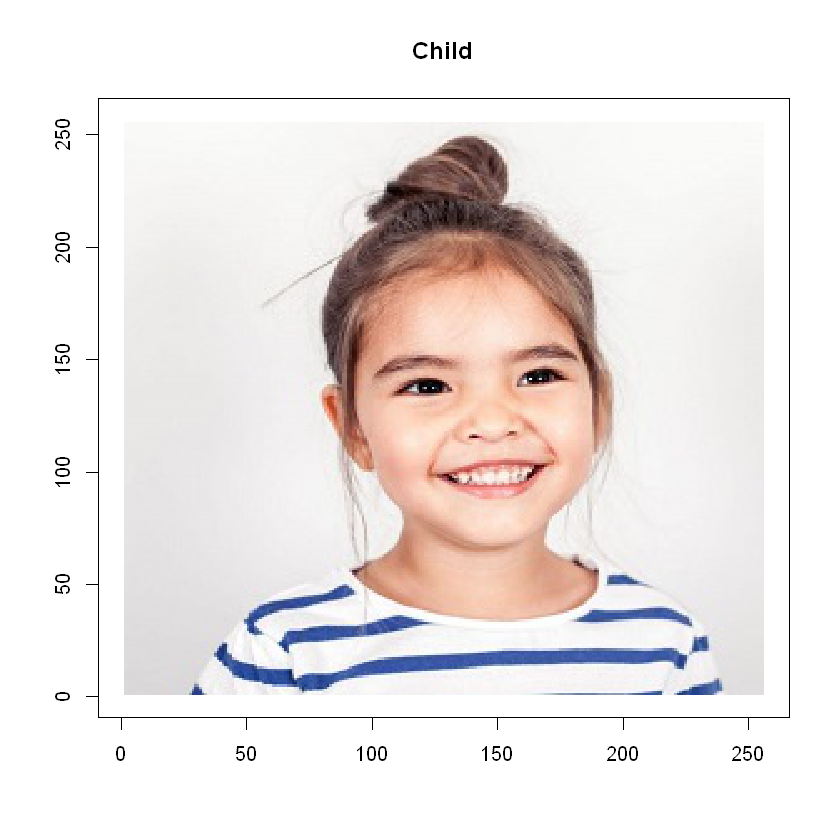

In [3]:
#Displaying image
plot(c(1, 256), c(1, 256), type = "n", xlab = "", ylab = "", 
     main = "Child")
rasterImage(child, 1, 1, 256, 256, angle = 0, interpolate = FALSE)

In [5]:
#Creating each channel of the image as following :
child_r = t(apply(child[,,1],2,rev))
child_g = t(apply(child[,,2],2,rev))
child_b = t(apply(child[,,3],2,rev))

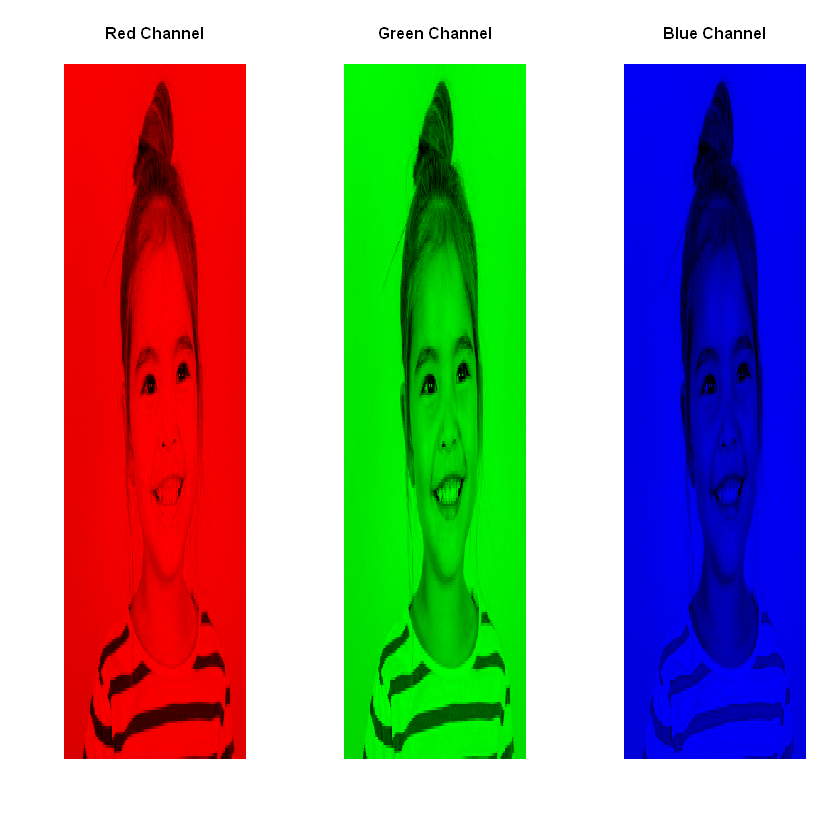

In [6]:
#Each channel of the image is displayed as following: 
red_palette = colorRampPalette(c("black","red"))
blue_palette = colorRampPalette(c("black","blue"))
green_palette = colorRampPalette(c("black","green")) 
par(mfrow = c(1,3))
image(child_r, col = red_palette(256), ann = TRUE, axes = FALSE, main = "Red Channel" )
image(child_g, col = green_palette(256), ann = TRUE, axes = FALSE, main = "Green Channel")
image(child_b, col = blue_palette(256), ann = TRUE, axes = FALSE, main = "Blue Channel" )

In [8]:
#Adding Noisy
install.packages('abind')
library(abind)

add_unif = function(x) {
  x = x + runif(1, min(child), 0.1*max(child))
  return(x)
}

greater_than_1 = function(x) {
  if (x > 1) {
    return(1)
  } else {
    return(x)
  }
}

child_r = child[, , 1]
child_r_noisy = apply(child_r, 1:2, add_unif)
child_r_noisy  = apply(child_r_noisy , c(1, 2), greater_than_1)

child_g = child[, , 2]
child_g_noisy = apply(child_g, 1:2, add_unif)
child_g_noisy = apply(child_g, c(1, 2), greater_than_1)

child_b = child[, , 3]
child_b_noisy = apply(child_b, 1:2, add_unif)
child_b_noisy = apply(child_b, c(1, 2), greater_than_1)

child_noisy = abind(child_r_noisy, child_g_noisy, along = 3)
child_noisy = abind(child_noisy, child_b_noisy, along = 3)

package 'abind' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\gizem\AppData\Local\Temp\RtmpicBN2q\downloaded_packages


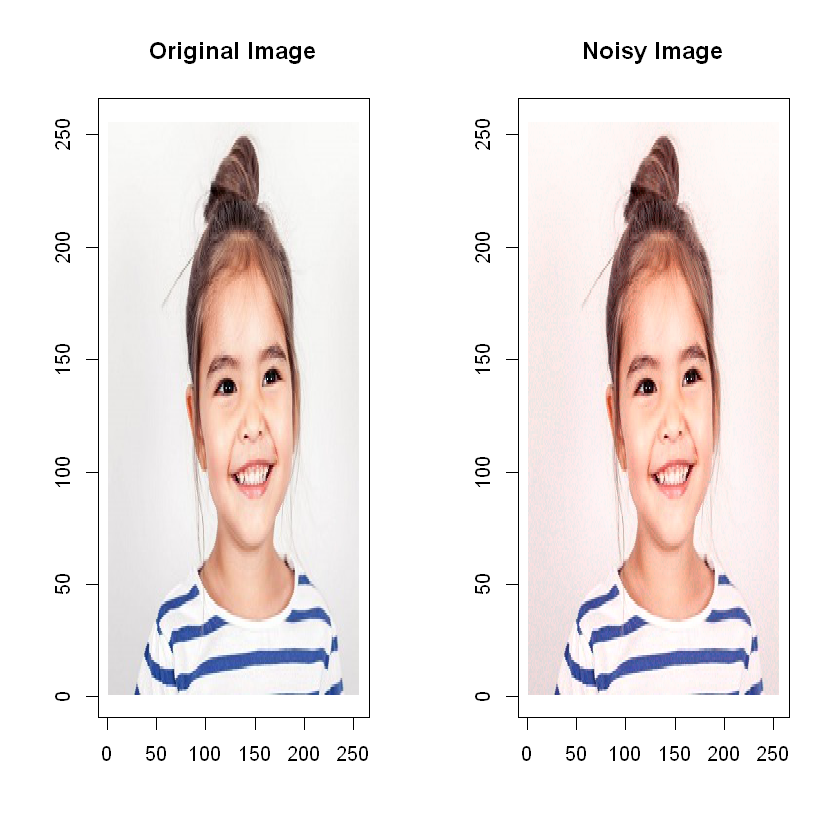

In [9]:
#Displaying the original and noisy images
par(mfrow=c(1,2))
plot(c(1, 256), c(1, 256), type = "n", xlab = "", ylab = "", 
     main = "Original Image")
rasterImage(child, 1, 1, 256, 256, angle = 0, interpolate = FALSE)
plot(c(1, 256), c(1, 256), type = "n", xlab = "", ylab = "", 
     main = "Noisy Image")
rasterImage(child_noisy, 1, 1, 256, 256, angle = 0, interpolate = FALSE)

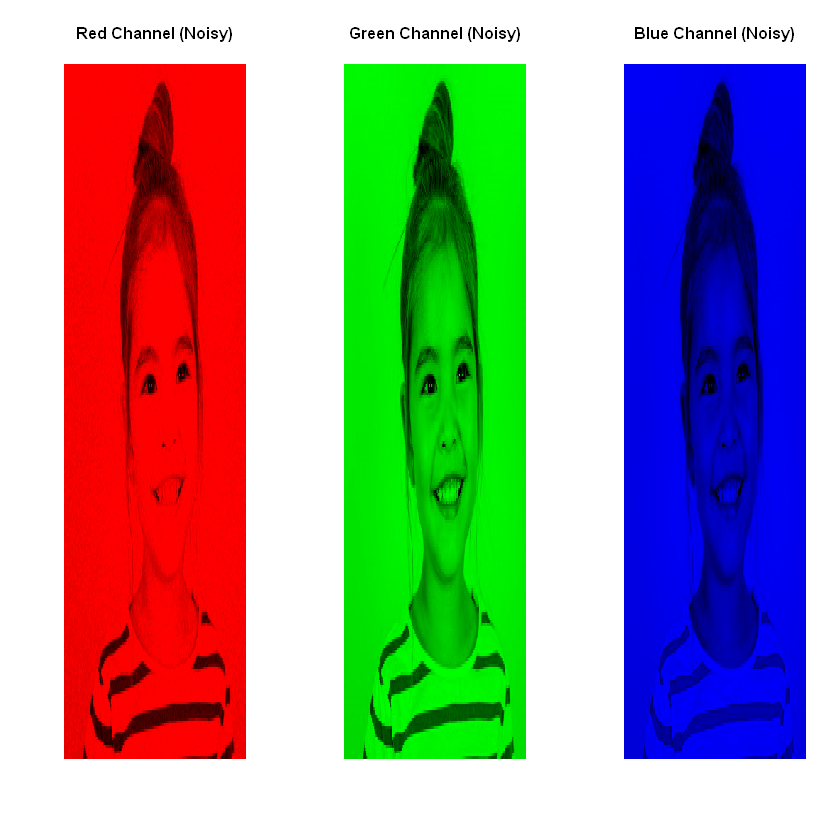

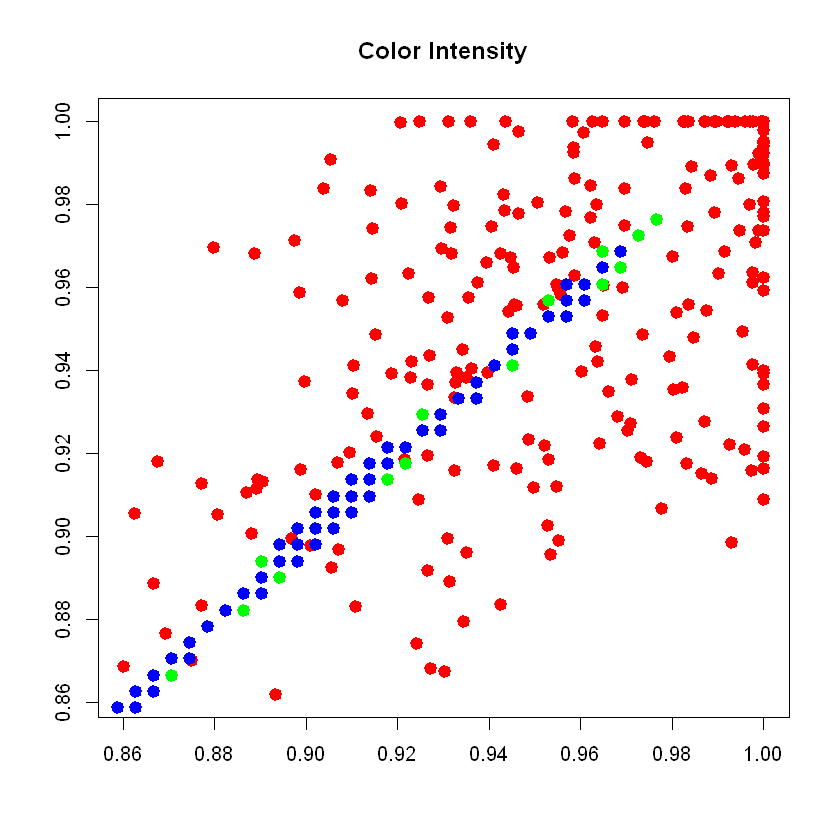

In [10]:
#Displaying each channel of noisy image
par(mfrow=c(1,3))
image(t(apply(child_r_noisy,2,rev)),col = red_palette(256), ann = TRUE, axes = FALSE, main = "Red Channel (Noisy)")
image(t(apply(child_g_noisy,2,rev)),col = green_palette(256), ann = TRUE, axes = FALSE, main = "Green Channel (Noisy)")
image(t(apply(child_b_noisy,2,rev)),col = blue_palette(256), ann = TRUE, axes = FALSE, main = "Blue Channel (Noisy)")

par(mfrow=c(1,1))
plot(child_r_noisy,pch=19,col="red",main='Color Intensity',xlab='', ylab='', lwd=4)
points(child_g_noisy,pch=19,col="green", lwd=4)
points(child_b_noisy,pch=19,col="blue", lwd=4)


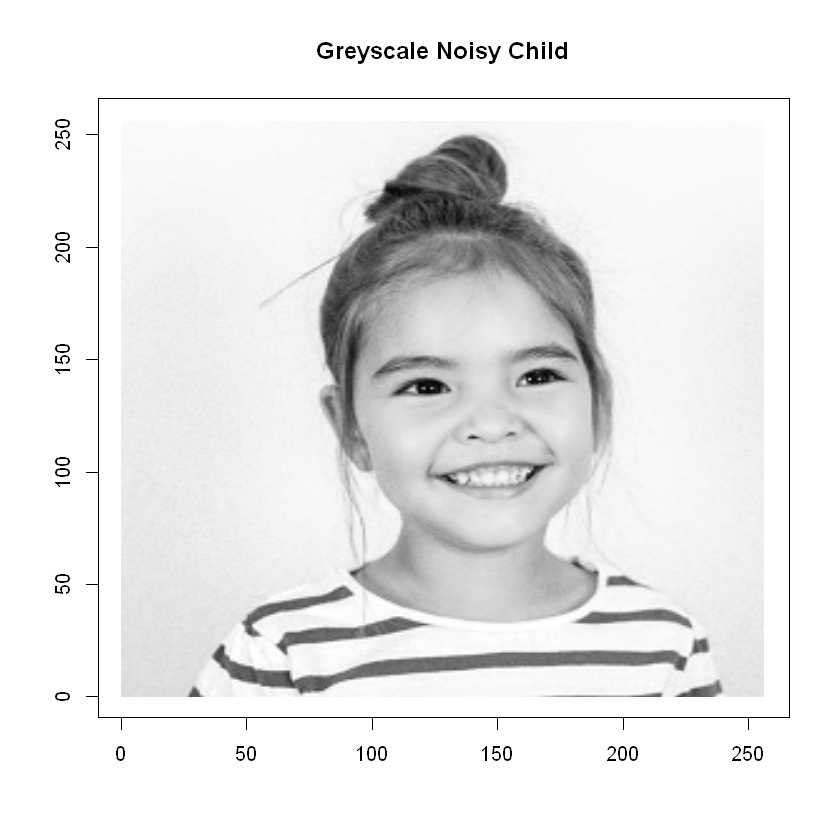

In [11]:
#Transforming noisy image to a greyscale one
child_greyscale<- child_noisy[,,1]+child_noisy[,,2]+child_noisy[,,3]
child_greyscale <- child_greyscale/max(child_greyscale)
plot(c(1, 256), c(1, 256), type = "n", xlab = "", ylab = "", 
     main = "Greyscale Noisy Child")
rasterImage(child_greyscale, 0,0,256,256)


# Task 2 - Part a

In [12]:
#Now, I will continue with the PCA analysis. I will use 25x25 channels in my analysis. 
#There will be 232x232 patches.
#Creating the data matrix with instances of 25x25 patches extracted for each pixel :
patches_matrix=matrix(0,232*232,25*25)
i=1
for(n in 1:232){
  for(k in 1:232){
    patches_matrix[i,]=as.vector(child_greyscale[n:(n+24),k:(k+24)])
    i=i+1}}

In [13]:
#Applying PCA
pca3=princomp(patches_matrix, cor=TRUE)
summary(pca3)

Importance of components:
                          Comp.1     Comp.2     Comp.3     Comp.4     Comp.5
Standard deviation     18.377177 7.74333365 6.23542218 5.16894885 4.44288463
Proportion of Variance  0.540353 0.09593475 0.06220878 0.04274885 0.03158276
Cumulative Proportion   0.540353 0.63628778 0.69849656 0.74124542 0.77282817
                           Comp.6     Comp.7     Comp.8     Comp.9    Comp.10
Standard deviation     3.85944406 3.69346199 2.87686208 2.75371915 2.50821382
Proportion of Variance 0.02383249 0.02182666 0.01324214 0.01213275 0.01006582
Cumulative Proportion  0.79666067 0.81848733 0.83172946 0.84386221 0.85392803
                          Comp.11     Comp.12     Comp.13     Comp.14
Standard deviation     2.44868209 2.283260946 2.239294117 1.917916566
Proportion of Variance 0.00959367 0.008341249 0.008023101 0.005885446
Cumulative Proportion  0.86352170 0.871862952 0.879886053 0.885771499
                           Comp.15     Comp.16     Comp.17     Comp.18
Sta

### First component explains 54.04% of all variance by itself, which is a huge proportion. Second and third components explain 9.6% and 6.21% of variance respectively.

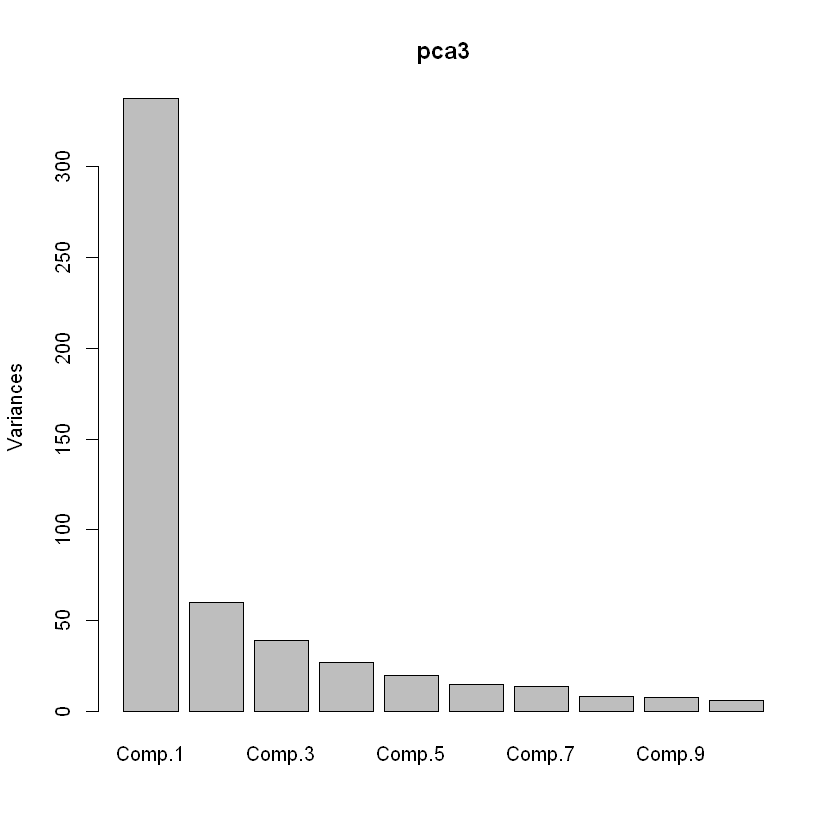

In [14]:
#PCA result can be plotted as following :
plot(pca3)

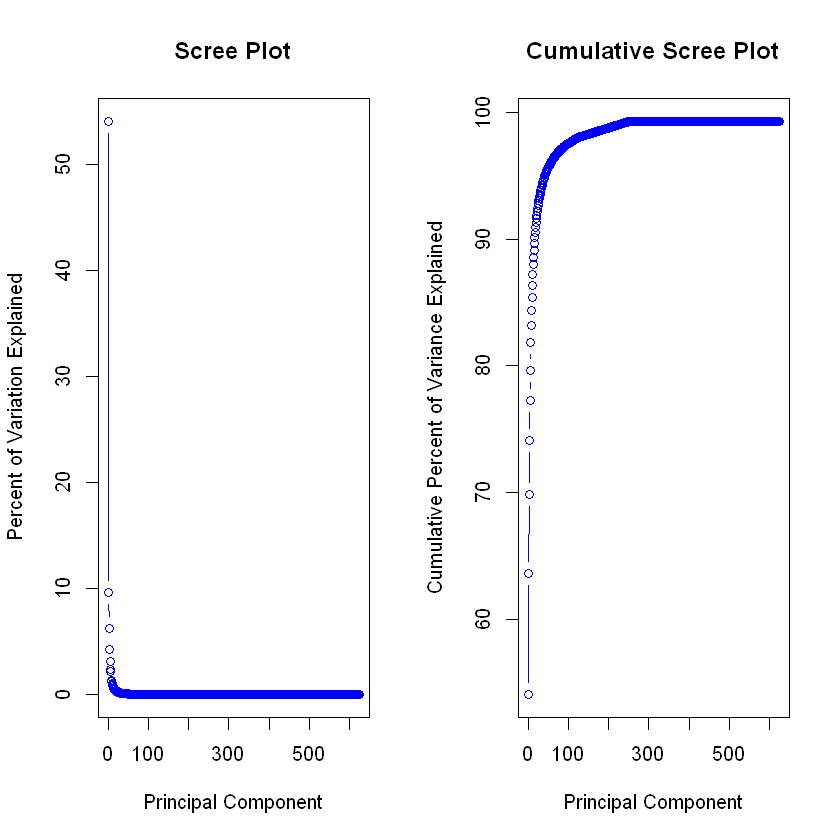

In [26]:
#Scree and cumulative scree plots can be drawn as following :
pca.var3 = pca3$sdev^2                                     
pca.var.per3 = round(pca.var3/sum(pca.var3)*100,2)
par(mfrow=c(1,2))
plot(pca.var.per3, main = "Scree Plot",
     xlab = "Principal Component",
     ylab = "Percent of Variation Explained", 
     type = "b",
     col="blue")
plot(cumsum(pca.var.per3), main = "Cumulative Scree Plot",
     xlab = "Principal Component",
     ylab = "Cumulative Percent of Variance Explained",
     type = "b",
     col="blue")

# Task 2 - Part b

In [22]:
#In order to reconstruct the image, the first three principal components are obtained:
mapped_points <- pca3$scores

first_pc <- mapped_points[,1]
first_pc<-matrix(first_pc,nrow=232,byrow = TRUE)
first_pc <- apply(first_pc, 2, rev)

second_pc <- mapped_points[,2]
second_pc<-matrix(second_pc,nrow=232,byrow = TRUE)
second_pc <- apply(second_pc, 2, rev)

third_pc <- mapped_points[,3]
third_pc<-matrix(third_pc,nrow=232,byrow = TRUE)
third_pc <- apply(third_pc, 2, rev)

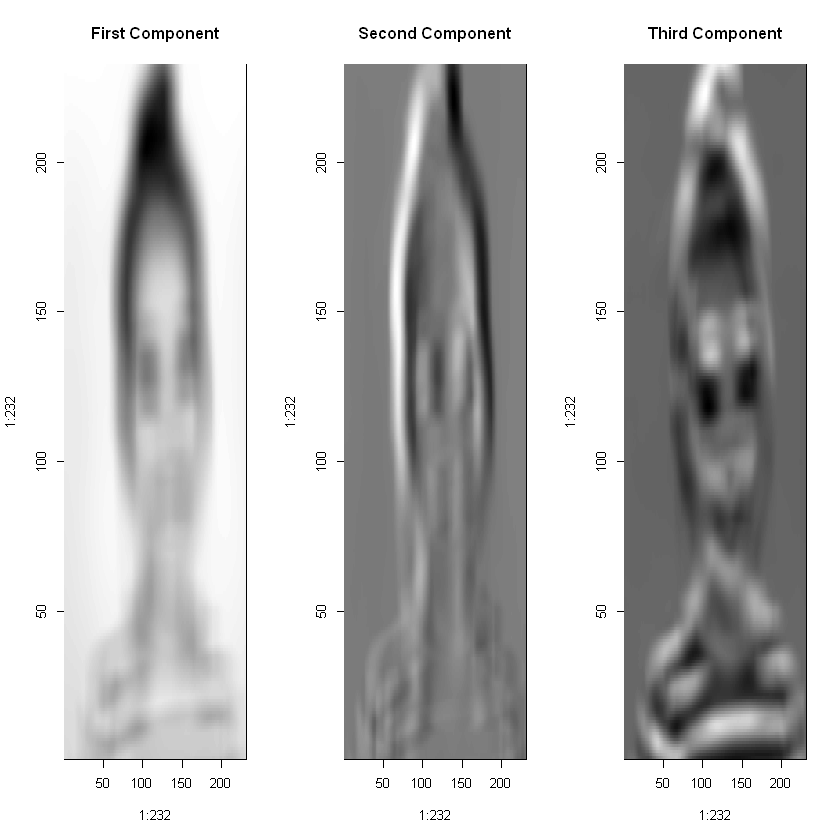

In [23]:
#Displaying first three components 
#Normalization is implemented by 'cor' in image function.
par(mfrow=c(1,3))
image(1:232, 1:232, t(first_pc), col=gray((0:116)/116), main = "First Component")
image(1:232, 1:232, t(second_pc), col=gray((0:116)/116), main = "Second Component")
image(1:232, 1:232, t(third_pc), col=gray((0:116)/116), main = "Third Component")

# Task 2 - Part c

In [24]:
#In order to reconstruct the image, the first three eigenvectors are obtained:
eigenvectors <- pca3$loadings

first_ev <- eigenvectors[, 1]
first_ev <- matrix(first_ev, nrow = 25, ncol = 25, byrow = TRUE)

second_ev <- eigenvectors[, 2]
second_ev <- matrix(second_ev, nrow = 25, ncol = 25, byrow = TRUE)

third_ev <- eigenvectors[, 3]
third_ev <- matrix(third_ev, nrow = 25, ncol = 25, byrow = TRUE)

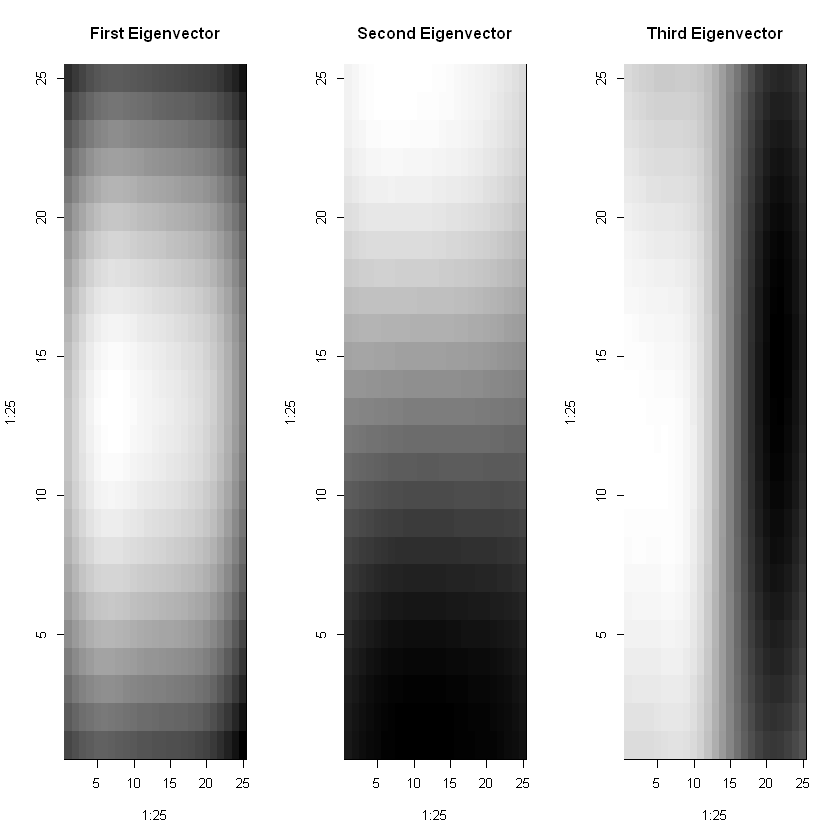

In [25]:
#Displaying first three eigenvectors
#Normalization is implemented by 'cor' in image function again.
par(mfrow=c(1,3))
image(1:25, 1:25, t(first_ev[ncol(first_ev):1, ]), col = gray((0:116)/116), 
      main = "First Eigenvector")
image(1:25, 1:25, t(second_ev[ncol(second_ev):1, ]), col = gray((0:116)/116), 
      main = "Second Eigenvector")
image(1:25, 1:25, t(third_ev[ncol(third_ev):1, ]), col = gray((0:116)/116), 
      main = "Third Eigenvector")


### Conclusion of Task 2 - Part c : 
It is observed that values in corresponding patches get higher, patches get brighter. Therefore, it can be observed that first eigenvector has more homogenous weights when it is compared to other two eigenvectors. While the highest values resides in left of the center, the lowest values resides in the corners.

Second image shows that the patches, which reside in the same row, have nearly the same weight. In addition, the patches, which are in upper edge of the image, have the highest weights, so they affect in a positive way. However, the patches, which are in lower edge of the image, have the lowest weights and they affect in a negative way due to their negative values.

Third image indicates that the patches, which are left edge of the image, have the most positive values, but getting closer to the right edge of the image, it is seen that values are getting negative.

